# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Beby Raihanah Mardini Putri
- **Email:** bebyraihanah@gmail.com
- **ID Dicoding:** bebyraihanah

## Menentukan Pertanyaan Bisnis

1. Apakah ada perbedaan pola peminjaman user antara hari kerja dan akhir pekan dalam kurun 2011-2012?

2. Bagaimana pola peminjaman sepeda dalam satu hari? (perbandingan jam-jam sibuk vs sepi)

3. Apakah kelembaban dan kecepatan angin berpengaruh terhadap jumlah peminjaman?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [15]:
# Load data dari file lokal
day_df = pd.read_csv("DATA/day.csv")

# Tampilkan 5 baris pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
# Load data dari file lokal
hour_df = pd.read_csv("DATA/hour.csv")

# Tampilkan 5 baris pertama
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**

Dataset day.csv dan hour.csv mencatat peminjaman sepeda berdasarkan waktu, cuaca, dan jenis pengguna. Jumlah peminjaman lebih tinggi di musim panas dan gugur, terutama saat cuaca cerah. Pengguna terdaftar lebih dominan dibandingkan casual, yang lebih dipengaruhi oleh cuaca dan hari libur.

Data per jam menunjukkan lonjakan peminjaman pada pagi dan sore hari di hari kerja, menandakan penggunaan untuk keperluan komuter. Sebaliknya, di akhir pekan, peminjaman lebih merata sepanjang hari, kemungkinan untuk rekreasi. Peminjaman juga lebih rendah pada hari libur dibandingkan hari kerja. Faktor suhu, kelembaban, dan angin turut memengaruhi kenyamanan pengguna dalam menggunakan sepeda.

Kesimpulan:

Karena tujuan analisis saya adalah memahami pola penggunaan harian, termasuk jam-jam sibuk dan dampak cuaca dalam kurun waktu yang dekat, saya memilih untuk menggunakan dataset hour.csv. Meskipun kedua dataset memiliki kesamaan dalam struktur data, hour.csv menyediakan informasi tambahan pada tingkat jam, sehingga lebih cocok untuk analisis yang lebih detail terkait tren penggunaan sepeda sepanjang hari.

### Assessing Data

In [17]:
# Memeriksa Tipe Data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
# Memeriksa Missing Value
hour_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
# Memeriksa Duplikasi Data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
# Meninjau statistik deskriptif

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

Dataset hour.csv terdiri dari 17 kolom dan 17.379 entri tanpa missing values atau duplikasi, sehingga siap untuk dianalisis. Data mencakup berbagai variabel waktu seperti tahun, bulan, hari dalam seminggu, dan jam, memungkinkan analisis pola penggunaan sepeda berdasarkan jam dalam sehari. Variabel cuaca seperti temperatur, kelembaban, dan kecepatan angin menunjukkan variasi kondisi lingkungan yang dapat memengaruhi jumlah penyewa sepeda. Dari segi penggunaan, jumlah rata-rata penyewa per jam adalah 189 dengan standar deviasi yang cukup besar, menunjukkan adanya fluktuasi yang signifikan. Pengguna terdaftar jauh lebih dominan dibandingkan pengguna tidak terdaftar, dengan jumlah maksimum penyewa mencapai 977 dalam satu jam dan minimum hanya 1 pengguna. Potensi analisis lebih lanjut dapat mencakup pola jam sibuk, perbandingan pengguna casual dan registered dalam berbagai kondisi cuaca, serta pengaruh hari kerja dan hari libur terhadap jumlah penyewa.

### Cleaning Data

In [21]:
# Melakukan revisi terhadap beberapa nama kolom yang tidak jelas

hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count',
    })

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
# Menghapus kolom yang tidak diperlukan

if "instant" in hour_df.columns:
    hour_df.drop(labels="instant", axis=1, inplace=True)
else:
    print("Kolom 'instant' tidak ditemukan dalam dataset.")

In [23]:
# Mengubah tipe data date menjadi datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])

# Memeriksa tipe data dteday
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weather     17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [24]:
# Mengubah nilai pada kolom weekday menjadi nama hari dan mengurutkannya

hour_df['weekday'] = hour_df['date'].dt.day_name()

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=weekday_order, ordered=True)
     

In [25]:
# Mengubah nilai pada kolom month menjadi nama bulan dan mengurutkannya

hour_df['month'] = hour_df['date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

hour_df['month'] = pd.Categorical(hour_df['month'], categories=month_order, ordered=True)

In [26]:
# Mengubah nilai pada kolom year menjadi tahun dan mengurutkannya

hour_df['year'] = hour_df['date'].dt.year

In [49]:
# Mengubah nilai pada kolom weather menjadi kondisi cuaca

hour_df.weather.replace((1,2,3,4), ('cerah', 'berkabut', 'hujan', 'hujan deras'), inplace=True)


In [48]:
# Mengubah nilai pada kolom workingday 
hour_df.workingday.replace((0,1), ('holiday', 'working day'), inplace=True)

In [47]:
# Mengubah nilai pada kolom season menjadi kondisi season (musim) yang ada

hour_df.season.replace((1,2,3,4), ('semi', 'panas', 'gugur', 'dingin'), inplace=True)

In [30]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  int32         
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  object        
 8   weather     17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(2), dateti

In [31]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,semi,2011,January,0,0,Saturday,holiday,cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,semi,2011,January,1,0,Saturday,holiday,cerah,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,semi,2011,January,2,0,Saturday,holiday,cerah,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,semi,2011,January,3,0,Saturday,holiday,cerah,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,semi,2011,January,4,0,Saturday,holiday,cerah,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
hour_df.to_csv('DASHBOARD/all_data.csv', index=False)

**Insight**

Dengan melakukan revisi pada nama variabel serta memberikan keterangan yang lebih jelas pada nilai-nilainya, dataset kini menjadi lebih mudah dipahami dan diinterpretasikan. Selain itu, penyesuaian tipe data di beberapa kolom tidak hanya meningkatkan efisiensi dalam pengolahan data, tetapi juga mempercepat proses analisis secara keseluruhan. Langkah ini membantu dalam memastikan bahwa data yang digunakan lebih akurat, terstruktur, dan siap untuk dieksplorasi lebih lanjut guna mendapatkan wawasan yang lebih mendalam.

### Exploratory Data Analysis (EDA)

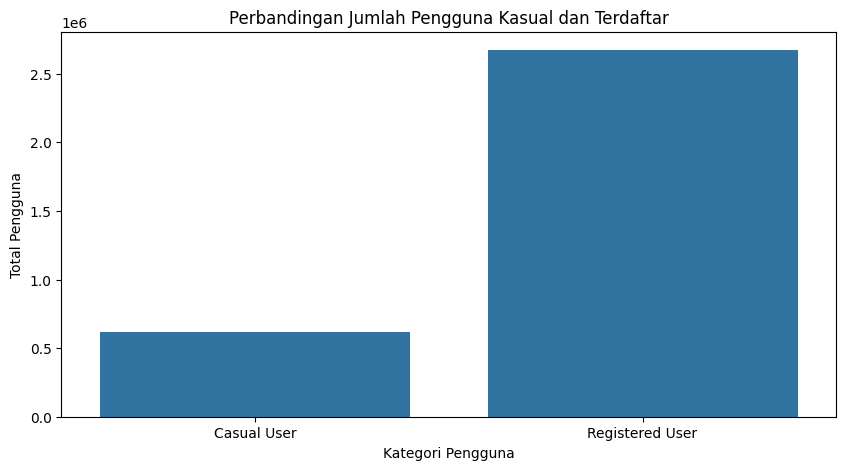

In [33]:
# Perbandingan Jumlah Pengguna Kasual dan Terdaftar

# Total pengguna kasual dan terdaftar
total_casual = 620017
total_registered = 2672662

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=['Casual User', 'Registered User'], y=[total_casual, total_registered])

# Menambahkan label
plt.xlabel("Kategori Pengguna")
plt.ylabel("Total Pengguna")
plt.title("Perbandingan Jumlah Pengguna Kasual dan Terdaftar")
plt.show()

**Insight**

Mayoritas pengguna berasal dari kategori terdaftar (2.672.662) dibandingkan dengan kasual (620.017), menunjukkan loyalitas yang lebih tinggi.

In [34]:
# Analisis daily user

daily_summary = hour_df.groupby('weekday', observed=True).aggregate({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

pd.set_option("display.float_format", "{:.2f}".format)  # Agar angka lebih rapi
print(daily_summary)

           casual                registered                   count           \
              sum  max min  mean        sum  max min   mean     sum  max min   
weekday                                                                        
Sunday     140521  317   0 56.16     303506  526   0 121.31  444027  776   1   
Monday      70784  272   0 28.55     384719  857   0 155.19  455503  968   1   
Tuesday     57843  178   0 23.58     411266  871   0 167.66  469109  970   1   
Wednesday   57319  237   0 23.16     415729  886   0 167.97  473048  977   1   
Thursday    61460  154   0 24.87     423935  885   0 171.56  485395  976   1   
Friday      78238  264   0 31.46     409552  757   0 164.68  487790  957   1   
Saturday   153852  367   0 61.25     323955  491   0 128.96  477807  783   1   

                  
            mean  
weekday           
Sunday    177.47  
Monday    183.74  
Tuesday   191.24  
Wednesday 191.13  
Thursday  196.44  
Friday    196.14  
Saturday  190.21  


C:\Users\FARIZ\AppData\Local\Temp\ipykernel_31484\3939774347.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_summary = hour_df.groupby('weekday')[['casual', 'registered', 'count']].sum()


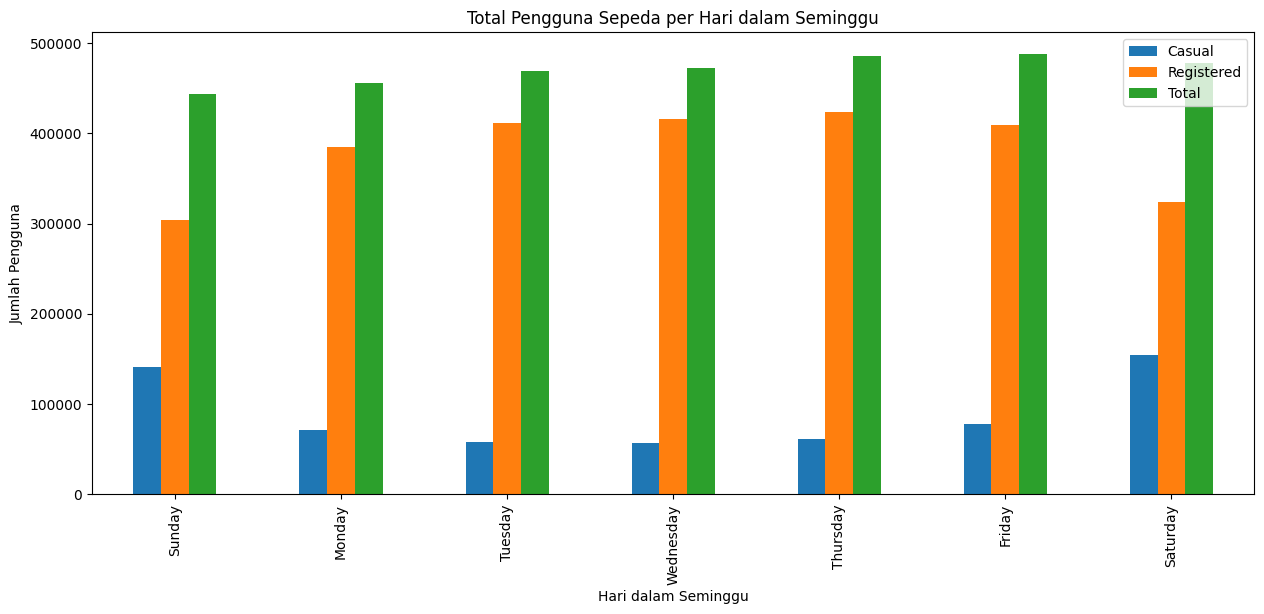

In [35]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menjumlahkan total pengguna
weekday_summary = hour_df.groupby('weekday')[['casual', 'registered', 'count']].sum()

# Plot data dalam bentuk bar chart
weekday_summary.plot(kind='bar', figsize=(15, 6))
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pengguna")
plt.title("Total Pengguna Sepeda per Hari dalam Seminggu")
plt.legend(["Casual", "Registered", "Total"])
plt.show()

**Insight**

Pengguna kasual cenderung memuncak di akhir pekan, terutama pada Sabtu (153.852) dan Minggu (140.521), sementara pengguna terdaftar lebih stabil di hari kerja dengan puncak pada Kamis (423.935), menjadikan Sabtu sebagai hari dengan total pengguna tertinggi (477.807), yang dapat dimanfaatkan untuk strategi promosi dan optimasi layanan.

In [36]:
# Analisis monthly user

monthly_summary = hour_df.groupby('month', observed=True).aggregate({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

pd.set_option("display.float_format", "{:.2f}".format)  # Agar angka lebih rapi
print(monthly_summary)


          casual                registered                   count           \
             sum  max min  mean        sum  max min   mean     sum  max min   
month                                                                         
January    12042  156   0  8.43     122891  518   0  86.00  134933  559   1   
February   14963  229   0 11.16     136389  567   0 101.71  151352  610   1   
March      44444  367   0 30.17     184476  693   0 125.24  228920  957   1   
April      60802  355   0 42.31     208292  697   0 144.95  269094  822   1   
May        75285  361   0 50.59     256401  770   1 172.31  331686  873   1   
June       73906  297   0 51.32     272436  796   0 189.19  346342  900   1   
July       78157  269   0 52.52     266791  790   1 179.30  344948  913   1   
August     72039  289   0 48.84     279155  811   0 189.26  351194  941   1   
September  70323  350   0 48.94     275668  886   0 191.84  345991  977   1   
October    59760  362   0 41.19     262592  876   1 

C:\Users\FARIZ\AppData\Local\Temp\ipykernel_31484\1574057216.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_summary = hour_df.groupby('month')[['casual', 'registered', 'count']].sum()


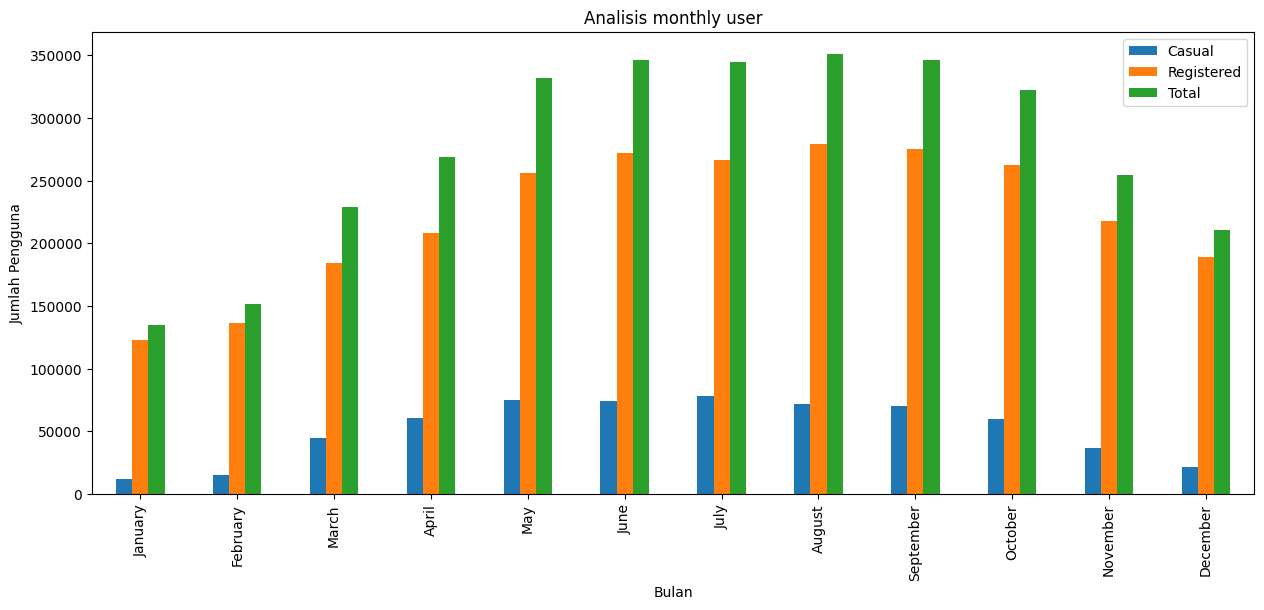

In [37]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan total pengguna
monthly_summary = hour_df.groupby('month')[['casual', 'registered', 'count']].sum()

# Plot data dalam bentuk bar chart
monthly_summary.plot(kind='bar', figsize=(15, 6))
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.title("Analisis monthly user")
plt.legend(["Casual", "Registered", "Total"])
plt.show()

**Insight**

Jumlah pengguna kasual dan terdaftar meningkat dari Januari hingga puncaknya pada Mei-Juli, dengan pengguna kasual tertinggi di Juli (78.157) dan pengguna terdaftar tertinggi di Agustus (279.155), menandakan musim panas sebagai periode aktivitas tertinggi, sebelum mengalami penurunan bertahap menuju akhir tahun, yang kemungkinan dipengaruhi oleh faktor cuaca atau perubahan kebiasaan pengguna.

In [38]:
# Analisis annual user

annual_summary = hour_df.groupby('year').aggregate({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

pd.set_option("display.float_format", "{:.2f}".format)  # Menampilkan angka dengan format lebih rapi
print(annual_summary)

      casual  registered    count
year                             
2011  247252      995851  1243103
2012  372765     1676811  2049576


<Axes: xlabel='year'>

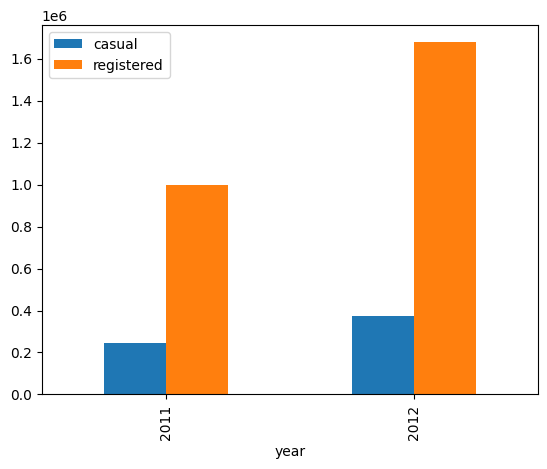

In [39]:
annual_data = hour_df.iloc[:, [2, 13, 14]]
annual_summary = annual_data.groupby('year').sum()
annual_summary.plot(kind='bar')

**Insight**

Terjadi peningkatan signifikan dalam jumlah pengguna dari tahun 2011 ke 2012, dengan pengguna kasual naik 50,8% (247.252 → 372.765) dan pengguna terdaftar meningkat 68,4% (995.851 → 1.676.811), yang menunjukkan pertumbuhan adopsi layanan yang kuat, kemungkinan didorong oleh strategi pemasaran, peningkatan layanan, atau faktor eksternal seperti tren penggunaan yang lebih luas.

In [40]:
# Analisis user by season

seasonal_summary = hour_df.groupby('season').aggregate({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

pd.set_option("display.float_format", "{:.2f}".format)  # Menampilkan angka dengan format lebih rapi
print(seasonal_summary)

        casual                registered                    count           \
           sum  max min  mean        sum  max min   mean      sum  max min   
season                                                                       
dingin  129782  362   0 30.67     711831  876   0 168.20   841613  967   1   
gugur   226091  350   0 50.29     835038  886   0 185.73  1061129  977   1   
panas   203522  361   0 46.16     715067  782   0 162.18   918589  957   1   
semi     60622  367   0 14.29     410726  681   0  96.82   471348  801   1   

               
         mean  
season         
dingin 198.87  
gugur  236.02  
panas  208.34  
semi   111.11  


**Insight**

Jumlah pengguna tertinggi tercatat pada musim gugur (1.061.129), diikuti oleh musim panas (918.589) dan musim dingin (841.613), sementara musim semi memiliki jumlah pengguna terendah (471.348). Pengguna kasual lebih banyak pada musim gugur (226.091) dan musim panas (203.522), menunjukkan bahwa cuaca yang lebih hangat mendorong penggunaan layanan. Sebaliknya, pengguna terdaftar tetap tinggi di semua musim, dengan puncak pada musim gugur (835.038), yang menunjukkan keterlibatan lebih stabil dibandingkan pengguna kasual yang lebih dipengaruhi oleh faktor cuaca.

In [41]:
# Analisis user by weather

weather_summary = hour_df.groupby('weather').aggregate({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

print(weather_summary)

             casual                registered                    count       \
                sum  max min  mean        sum  max min   mean      sum  max   
weather                                                                       
berkabut     134481  350   0 29.60     661471  822   0 145.57   795952  957   
cerah        462745  367   0 40.55    1875428  886   0 164.32  2338173  977   
hujan         22783  263   0 16.06     135548  791   0  95.52   158331  891   
hujan deras       8    6   1  2.67        215  158  22  71.67      223  164   

                        
            min   mean  
weather                 
berkabut      1 175.17  
cerah         1 204.87  
hujan         1 111.58  
hujan deras  23  74.33  


<Axes: xlabel='weather'>

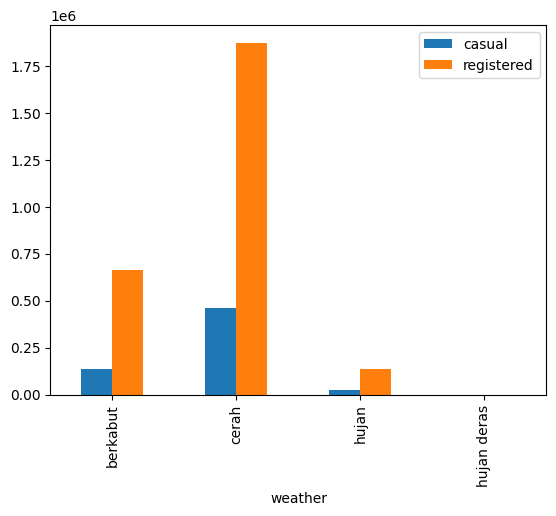

In [42]:
weather_data = hour_df.iloc[:, [8, 13, 14]]
weather_summary = weather_data.groupby('weather').sum()
weather_summary.plot(kind='bar')

**Insight**

Mayoritas pengguna menggunakan layanan saat cuaca cerah (2.338.173), dengan pengguna kasual (462.745) dan terdaftar (1.875.428) jauh lebih tinggi dibandingkan kondisi cuaca lainnya. Saat berkabut, jumlah pengguna menurun menjadi 795.952, menunjukkan bahwa kondisi cuaca yang kurang ideal sedikit mengurangi penggunaan layanan. Penggunaan semakin menurun saat hujan (158.331) dan mencapai titik terendah saat hujan deras (223), menunjukkan bahwa cuaca ekstrem sangat membatasi aktivitas pengguna. Meskipun pengguna terdaftar tetap lebih dominan dalam semua kondisi cuaca, pengguna kasual lebih sensitif terhadap perubahan cuaca, terutama saat hujan dan hujan deras.

In [43]:
# Analisi data user berdasarkan status hari kerja & hari libur
workingday_summary = hour_df.groupby('workingday', observed=True).aggregate({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

# Menampilkan hasil
workingday_summary

casual                registered                    count       \
                sum  max min  mean        sum  max min   mean      sum  max   
workingday                                                                    
holiday      316732  367   0 57.44     683537  601   0 123.96  1000269  783   
working day  303285  264   0 25.56    1989125  886   0 167.65  2292410  977   

                        
            min   mean  
workingday              
holiday       1 181.41  
working day   1 193.21

**Insight**

Pada hari libur, pengguna kasual lebih mendominasi dengan total 316.732 pengguna dan rata-rata harian 57,44, menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai. Sebaliknya, pada hari kerja, pengguna terdaftar jauh lebih banyak dengan total 1.989.125 pengguna dan rata-rata harian 167,65, yang mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi rutin. Secara keseluruhan, meskipun pengguna kasual meningkat di hari libur, total penggunaan sepeda lebih tinggi di hari kerja (2.292.410 pengguna) dibandingkan hari libur (1.000.269 pengguna), yang menunjukkan bahwa sepeda lebih banyak dimanfaatkan untuk mobilitas sehari-hari daripada sekadar rekreasi.

## Visualization & Explanatory Analysis

PERTANYAAN 1: Apakah ada perbedaan pola peminjaman user antara hari kerja dan akhir pekan dalam kurun 2011-2012?

<Figure size 1200x600 with 0 Axes>

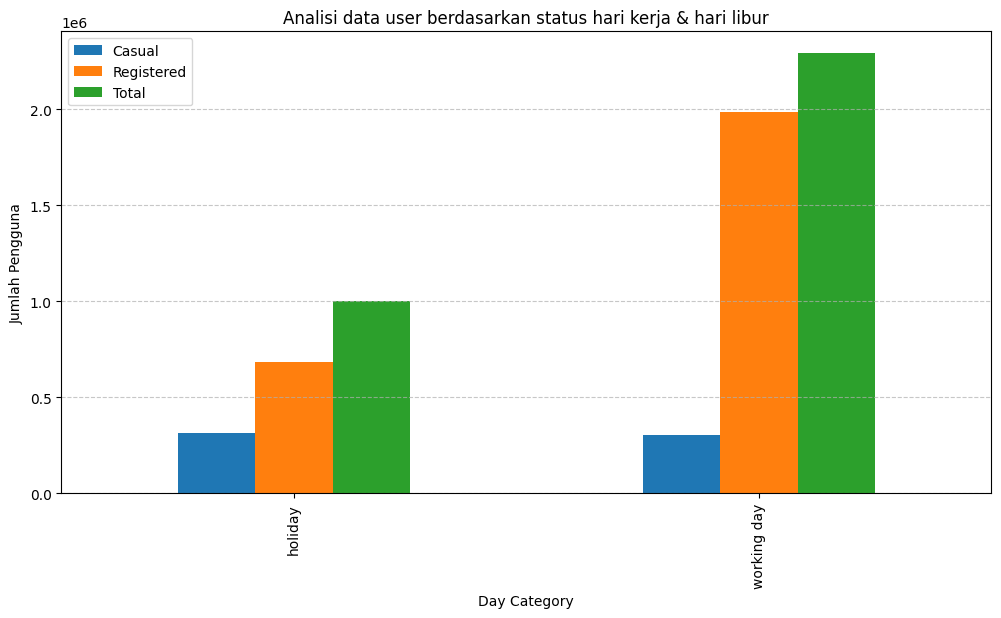

In [44]:
# Mengelompokkan data berdasarkan hari kerja dan menghitung total pengguna
workingday_summary = hour_df.groupby('workingday')[['casual', 'registered', 'count']].sum()

# Membuat visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 6))
workingday_summary.plot(kind='bar', figsize=(12, 6))

# Menambahkan label dan judul
plt.xlabel("Day Category")
plt.ylabel("Jumlah Pengguna")
plt.title("Analisi data user berdasarkan status hari kerja & hari libur")
plt.legend(["Casual", "Registered", "Total"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight**

Pada grafik diatas dapat dilihat bahwa user pengguna rental bike di hari libur didominasi oleh casual user, hal ini menunjukkan pemanfaatan sepeda untuk rekreasi. Sebaliknya, di hari kerja, registered user lebih banyak dibanding casual user, dapat diasumsikan bahwa penggunaan oleh registered user tersebut untuk transportasi rutin. Grafik diatas juga menggambarkan total penggunaan lebih tinggi pada hari kerja, menegaskan bahwa sepeda lebih banyak digunakan untuk mobilitas sehari-hari.

PERTANYAAN 2: Bagaimana pola peminjaman sepeda dalam satu hari? (perbandingan jam-jam sibuk vs sepi)

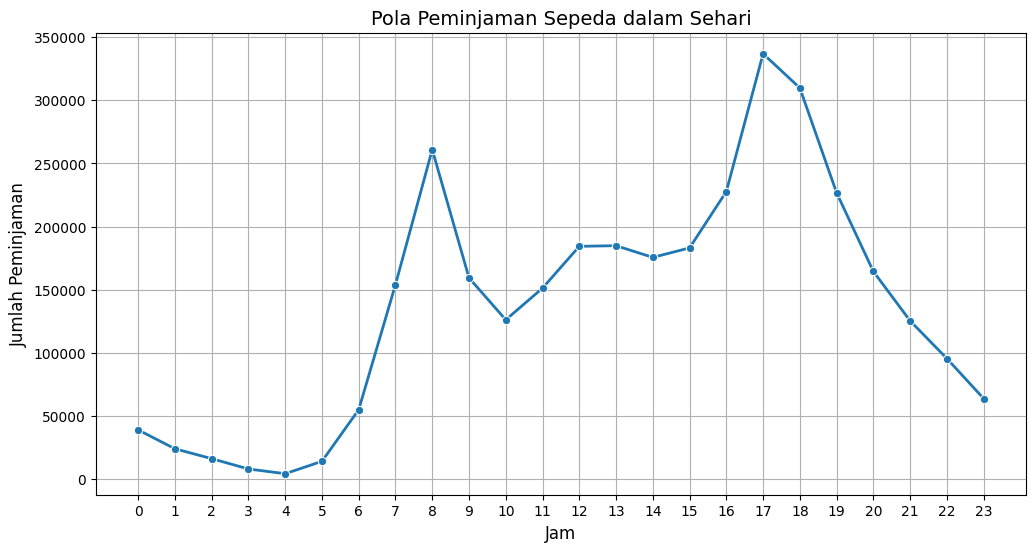

In [45]:
# Mengelompokkan data berdasarkan jam
hourly_rentals = hour_df.groupby("hour")["count"].sum()

# Visualisasi menggunakan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o', linewidth=2)

# Menambahkan label
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.title("Pola Peminjaman Sepeda dalam Sehari", fontsize=14)
plt.xticks(range(0, 24))  # Menampilkan setiap jam
plt.grid(True)

# Menampilkan plot
plt.show()

**Insight**

Peminjaman sepeda menunjukkan pola yang jelas dalam satu hari. Jumlah peminjaman meningkat signifikan pada pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00), menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja atau sekolah. Di luar jam sibuk tersebut, peminjaman tetap stabil di siang hari, kemungkinan untuk keperluan pribadi atau rekreasi. Sementara itu, aktivitas peminjaman menurun drastis pada larut malam hingga dini hari. Pola ini mengindikasikan bahwa pengguna terdaftar lebih dominan pada jam sibuk, sedangkan pengguna kasual lebih sering meminjam di siang dan sore hari.

PERTANYAAN 3: Apakah kelembaban dan kecepatan angin berpengaruh terhadap jumlah peminjaman?

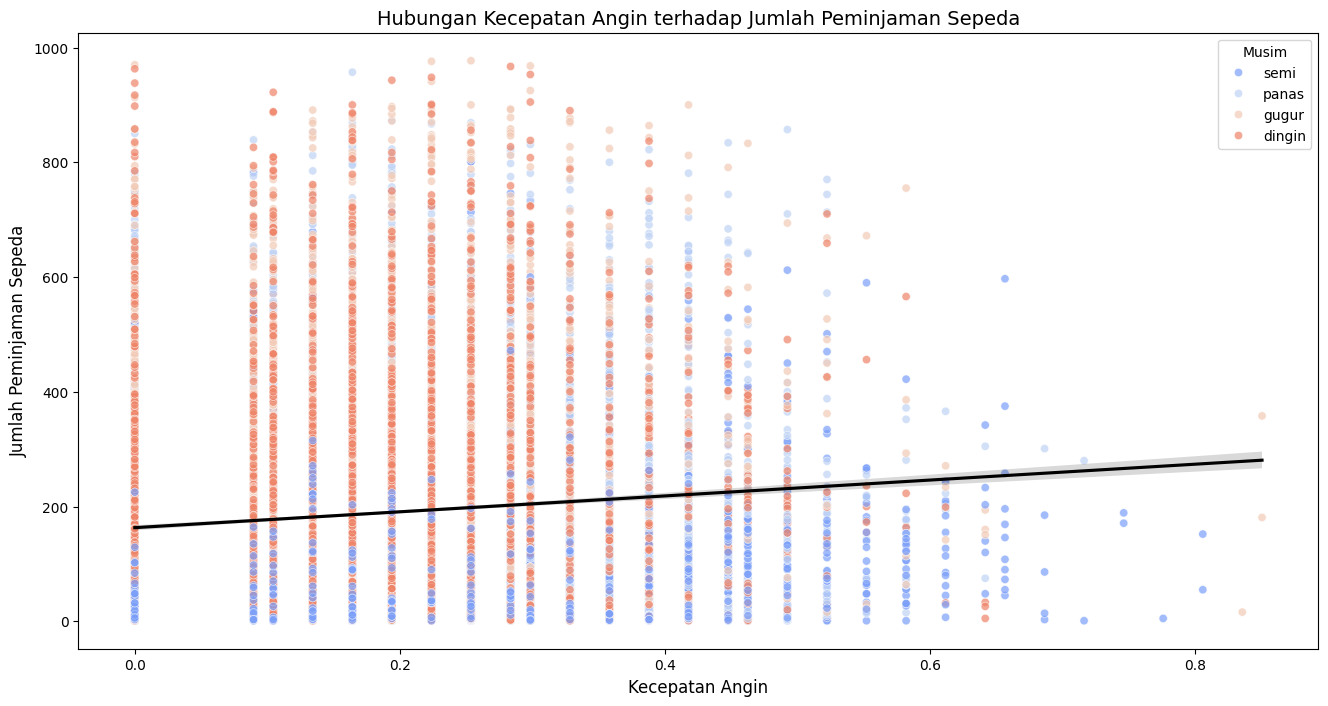

In [46]:
# Visualisasi hubungan kecepatan angin dan jumlah peminjaman sepeda
plt.figure(figsize=(16, 8))

# Scatter plot dengan warna berbeda untuk setiap musim
sns.scatterplot(x=hour_df['windspeed'], y=hour_df['count'], hue=hour_df['season'], palette='coolwarm', alpha=0.7)

# Menambahkan regresi untuk melihat tren hubungan antara kecepatan angin dan jumlah peminjaman
sns.regplot(x=hour_df['windspeed'], y=hour_df['count'], scatter=False, color='black')

plt.xlabel("Kecepatan Angin", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.title("Hubungan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda", fontsize=14)
plt.legend(title="Musim", loc="upper right")
plt.show()

**Insight**

Grafik ini menunjukkan hubungan antara kecepatan angin dan jumlah peminjaman sepeda, dengan warna titik yang merepresentasikan musim (semi, panas, gugur, dingin). Garis hitam adalah garis regresi yang menunjukkan tren hubungan antara kedua variabel.

1. Kecepatan angin tidak memiliki dampak signifikan terhadap jumlah peminjaman sepeda. Ini terlihat dari garis regresi yang hampir datar, menunjukkan bahwa perubahan dalam kecepatan angin tidak banyak memengaruhi jumlah peminjaman.
2. Penggunaan sepeda tetap tinggi dalam berbagai musim, terutama pada musim panas dan gugur (ditunjukkan oleh titik-titik yang lebih padat di bagian atas grafik).
3. Pada kecepatan angin rendah (0-0.2), jumlah peminjaman bervariasi dari rendah hingga tinggi, yang menunjukkan bahwa kondisi angin ringan lebih umum terjadi.
Pada kecepatan angin tinggi (>0.6), jumlah peminjaman cenderung lebih rendah, meskipun masih ada beberapa peminjaman. Ini mengindikasikan bahwa angin kencang bisa sedikit mengurangi minat pengguna untuk bersepeda.
4. Secara keseluruhan, kecepatan angin bukan faktor utama yang memengaruhi peminjaman sepeda, tetapi dalam kondisi ekstrem (angin kencang), jumlah peminjaman mungkin sedikit menurun.

## Conclusion

- Pola peminjaman sepeda menunjukkan adanya perbedaan yang mencolok antara hari kerja dan akhir pekan. Pada hari kerja, jumlah peminjaman lebih tinggi dengan dominasi pengguna terdaftar (registered user), yang mengindikasikan bahwa sepeda digunakan sebagai moda transportasi utama dalam aktivitas sehari-hari seperti bekerja atau sekolah. Sementara itu, pada akhir pekan, pola peminjaman bergeser dengan dominasi pengguna kasual (casual user), yang menunjukkan bahwa sepeda lebih banyak dimanfaatkan untuk keperluan rekreasi dibandingkan transportasi rutin.

- Peminjaman sepeda dalam sehari membentuk pola yang mencerminkan kebiasaan mobilitas pengguna. Dua periode puncak peminjaman terjadi pada pagi hari dan sore hari, menunjukkan korelasi kuat dengan jam masuk dan pulang kerja atau sekolah. Sementara itu, di siang hari, meskipun tidak sepadat jam sibuk, peminjaman tetap cukup stabil, yang kemungkinan besar disebabkan oleh pengguna kasual yang memanfaatkan sepeda untuk aktivitas santai atau perjalanan pendek. Pada malam hingga dini hari, peminjaman turun drastis, menunjukkan bahwa penggunaan sepeda di luar jam operasional utama sangat minim.

- Dari analisis hubungan kecepatan angin dengan jumlah peminjaman sepeda, dapat disimpulkan bahwa faktor ini tidak memiliki dampak signifikan terhadap keputusan pengguna dalam menyewa sepeda. Kecepatan angin rendah hingga sedang tidak menghambat peminjaman, tetapi pada kecepatan angin yang lebih tinggi, terjadi sedikit penurunan jumlah peminjaman. Selain itu, distribusi peminjaman menunjukkan bahwa jumlah pengguna lebih tinggi pada musim panas dan gugur, mengindikasikan bahwa faktor cuaca yang lebih nyaman menjadi salah satu pertimbangan utama dibandingkan faktor kecepatan angin itu sendiri.